# Self-attenion mechanism with trainable weights

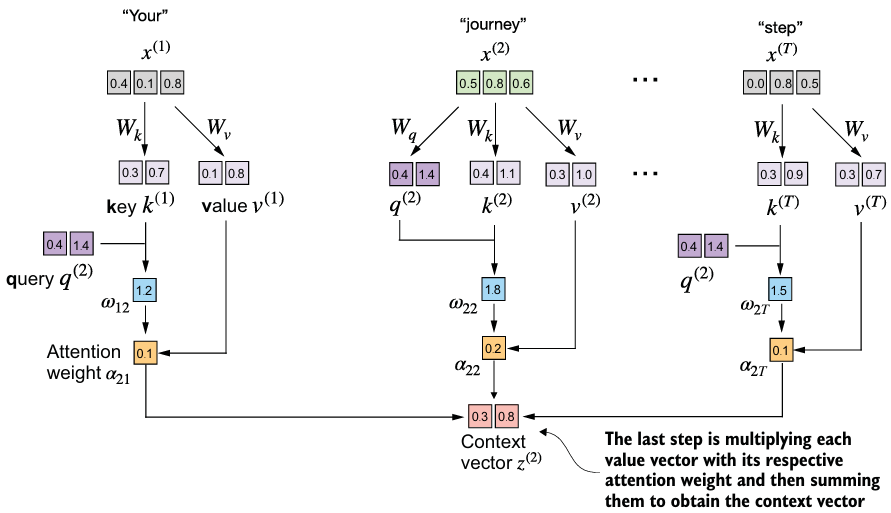

In [2]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], 
   [0.55, 0.87, 0.66], 
   [0.57, 0.85, 0.64], 
   [0.22, 0.58, 0.33], 
   [0.77, 0.25, 0.10], 
   [0.05, 0.80, 0.55]] 
)

In [4]:
x_1 = inputs[0]  
print(x_1)

tensor([0.4300, 0.1500, 0.8900])


In [11]:
d_in = inputs.shape[-1]
d_out = d_in

w_q = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
w_k = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
w_v = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

print(w_q)

Parameter containing:
tensor([[0.6689, 0.7526, 0.5076],
        [0.5668, 0.9909, 0.7730],
        [0.6607, 0.6614, 0.5624]])


In [12]:
query_1 = x_1 @ w_q
key_1   = x_1 @ w_k
value_1 = x_1 @ w_v

print(query_1)

tensor([0.9606, 1.0609, 0.8347])


In [14]:
keys = inputs @ w_k
values = inputs @ w_v

In [16]:
atten_score_1 = query_1 @ keys.T
atten_score_1

tensor([2.2566, 2.5082, 2.4814, 1.2931, 1.3010, 1.6485])

In [18]:
atten_weight_1 = torch.softmax(
    atten_score_1 / keys.shape[-1]**0.5, dim=-1 # normalization
)
atten_weight_1

tensor([0.1942, 0.2246, 0.2212, 0.1114, 0.1119, 0.1367])

In [19]:
context_vector_2 = atten_weight_1 @ values
context_vector_2

tensor([0.5909, 1.0657, 0.3103])

In [ ]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):

    def __init__(self, d_in, d_out):
        super().__init__()
        # trainable weights
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        
        attn_scores = queries @ keys.T 
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1 # normalization 
        )

        context_vec = attn_weights @ values
        return context_vec

torch.manual_seed(123)
# d_in = input_embeddings.shape[-1]
# d_out = d_in  
sa = SelfAttention_v1(d_in, d_out=)
# context_vecs = sa(input_embeddings)